In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')

In [40]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
df['MedHouseVal'] = data.target

In [43]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MedHouseVal', axis=1), df['MedHouseVal'], test_size=0.2, random_state=42)

In [44]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [45]:
x_train_scaled.shape

(16512, 8)

In [46]:
import keras

In [47]:
input_shape = x_train_scaled.shape[1]

In [48]:
model = keras.models.Sequential(
    [
        keras.Input(shape=(x_train_scaled.shape[1] ,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1) # output = mean house value #MedHouseVal
    ]
)

In [49]:
model.compile( optimizer='adam', loss='mse', metrics=['mae'])

In [50]:
x_train_scaled.min(), x_train_scaled.max()

(np.float64(-2.377207142428577), np.float64(107.11644677509909))

In [51]:
history = model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.8432 - mae: 0.9488 - val_loss: 0.4647 - val_mae: 0.4775
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4028 - mae: 0.4521 - val_loss: 0.4088 - val_mae: 0.4572
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3826 - mae: 0.4377 - val_loss: 0.3917 - val_mae: 0.4433
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3582 - mae: 0.4177 - val_loss: 0.4012 - val_mae: 0.4460
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3718 - mae: 0.4220 - val_loss: 0.3706 - val_mae: 0.4347
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3260 - mae: 0.4010 - val_loss: 0.3643 - val_mae: 0.4202
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3099 - mae: 0.3933 - val_loss: 0.3447 - val_mae: 0.4063
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3237 - mae: 0.3986 - val_loss: 0.3574 - val_mae: 0.4159
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

In [53]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [54]:
pd.DataFrame(history.history)

,loss,mae,val_loss,val_mae
0,0.934866,0.656641,0.464650,0.477475
1,0.403032,0.451292,0.408844,0.457196
2,0.375472,0.433864,0.391696,0.443311
3,0.395689,0.427076,0.401174,0.446006
4,0.350494,0.414709,0.370583,0.434704
...,...,...,...,...
95,0.232555,0.329761,0.293068,0.383011
96,0.229424,0.327343,0.282874,0.353799
97,0.229298,0.326574,0.276718,0.353001
98,0.227458,0.325102,0.278843,0.362948


In [55]:
import matplotlib.pyplot as plt

In [56]:
model_history = history
history = history.history

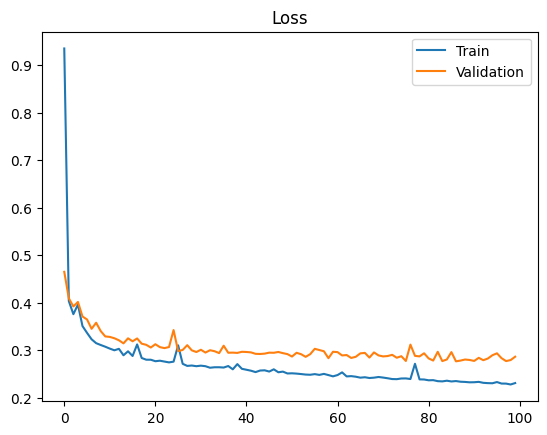

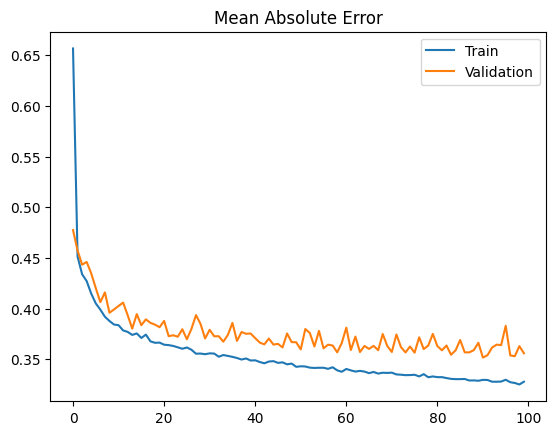

In [57]:
loss = history["loss"]
mae = history["mae"]
val_mae = history["val_mae"]
val_loss = history["val_loss"]


plt.plot(loss)
plt.plot(val_loss)
plt.title("Loss")
plt.legend(["Train", "Validation"], loc='upper right')
plt.show()

plt.plot(mae)
plt.plot(val_mae)
plt.title("Mean Absolute Error")
plt.legend(["Train", "Validation"], loc='upper right')
plt.show()


In [62]:
model_history_20_epochs = model.fit(x_train_scaled, y_train, epochs=20, validation_split=0.2, batch_size=32)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2206 - mae: 0.3215 - val_loss: 0.2810 - val_mae: 0.3592
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2274 - mae: 0.3250 - val_loss: 0.2796 - val_mae: 0.3576
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2218 - mae: 0.3229 - val_loss: 0.2813 - val_mae: 0.3580
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2227 - mae: 0.3238 - val_loss: 0.2814 - val_mae: 0.3670
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2293 - mae: 0.3258 - val_loss: 0.2906 - val_mae: 0.3607
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2250 - mae: 0.3212 - val_loss: 0.2826 - val_mae: 0.3596
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2288 - mae: 0.3263 - val_loss: 0.2754 - val_mae: 0.3564
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2166 - mae: 0.3189 - val_loss: 0.2787 - val_mae: 0.3546
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - lo

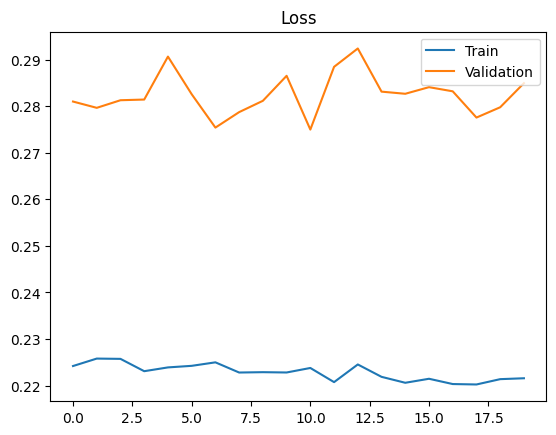

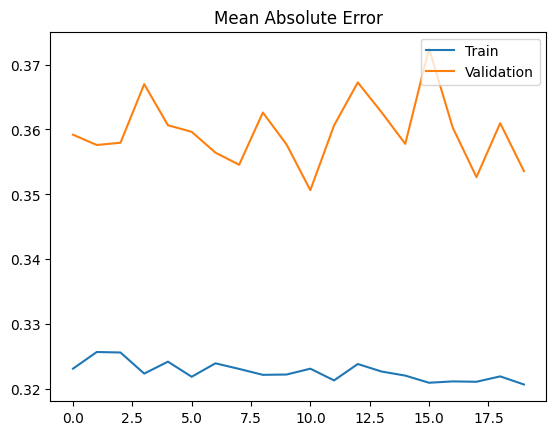

In [63]:
history = model_history_20_epochs.history

loss = history["loss"]
mae = history["mae"]
val_mae = history["val_mae"]
val_loss = history["val_loss"]


plt.plot(loss)
plt.plot(val_loss)
plt.title("Loss")
plt.legend(["loss", "val_loss"])
plt.legend(["Train", "Validation"], loc='upper right')
plt.show()

plt.plot(mae)
plt.plot(val_mae)
plt.title("Mean Absolute Error")
plt.legend(["Train", "Validation"], loc='upper right')
plt.show()

In [60]:
model.predict(x_test_scaled)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.64865106],
       [2.886927  ],
       [7.0216427 ],
       ...,
       [5.429097  ],
       [1.2410507 ],
       [1.7275143 ]], dtype=float32)

In [61]:
model.evaluate(x_test_scaled, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5929 - mae: 1.2385


[3.6272060871124268, 1.2398364543914795]